# Comparando buscas em grades realizadas

## importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
from seaborn import scatterplot

## GridSearch Realizada para C variando nos ímpares de 1 a 99

param_C,mean_test_score,std_test_score
1.000000,0.812069,0.170564
3.000000,0.802699,0.172211
5.000000,0.794360,0.178231
7.000000,0.791417,0.178229
9.000000,0.789545,0.177078
11.000000,0.787785,0.177732
13.000000,0.787164,0.178027
15.000000,0.785521,0.179230
17.000000,0.784179,0.180364
19.000000,0.782299,0.180639


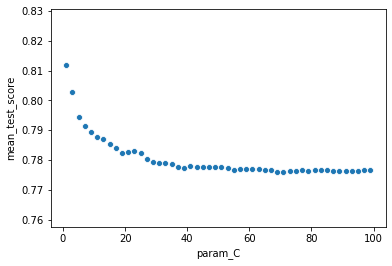

In [2]:
old_gs_ova_from_1_to_99_df = pd.read_csv('./06-gs-svc-param_C.csv')

scatterplot(
    data=old_gs_ova_from_1_to_99_df,
    x='param_C',
    y='mean_test_score'
)

old_gs_ova_from_1_to_99_df.head(10)[['param_C', 'mean_test_score', 'std_test_score']].style.background_gradient(cmap='Reds', subset=['mean_test_score']).hide_index()

## Comparando GridSearch com alguns e todos os canais

Dessa vez utilizando `make_pipeline` para fazer o preprocessamento durante a busca.

param_C,mean_of_some_channels,std_of_some_channels,mean_of_all_channels,std_of_all_channels
0.250000,0.812465,0.177642,0.817589,0.171375
0.500000,0.810229,0.179620,0.816416,0.171178
0.750000,0.807811,0.177593,0.815383,0.167612
1.000000,0.806454,0.177619,0.812359,0.170860
1.250000,0.805688,0.178423,0.810972,0.169220
1.500000,0.804752,0.180889,0.809671,0.171001
1.750000,0.804130,0.182248,0.809921,0.169023
2.000000,0.802675,0.181968,0.809437,0.169100


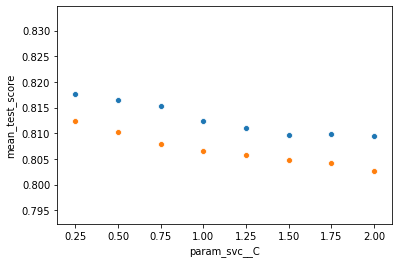

In [3]:
interesting_columns = ['param_svc__C', 'mean_test_score', 'std_test_score']

gs_ova_all_channels_df = pd.read_csv('./08-pipe-gs-svc-param_C.csv')
gs_ova_some_channels_df = pd.read_csv('./09-pipe-gs-svc-oneVSall_with_some_6channels.csv')

compare_df = pd.DataFrame()
compare_df['param_C'] = gs_ova_some_channels_df['param_svc__C']

for test, df in zip(['some', 'all'], [gs_ova_some_channels_df, gs_ova_all_channels_df]):
    compare_df[f'mean_of_{test}_channels'] = df['mean_test_score']
    compare_df[f'std_of_{test}_channels'] = df['std_test_score']

scatterplot(
    data=gs_ova_all_channels_df,
    x='param_svc__C',
    y='mean_test_score'
)

scatterplot(
    data=gs_ova_some_channels_df,
    x='param_svc__C',
    y='mean_test_score'
)

compare_df.style.background_gradient(cmap='Blues', subset=['mean_of_some_channels', 'mean_of_all_channels']).hide_index()

## Resultado do experimento 3 para fins de comparação

,all channels,2_3_6_7_10_14 channels
count,21.000000,21.000000
mean,0.812359,0.806454
std,0.175079,0.182006
min,0.323529,0.352941
25%,0.796875,0.784722
50%,0.870370,0.868056
75%,0.925455,0.944444
max,0.969697,0.974747


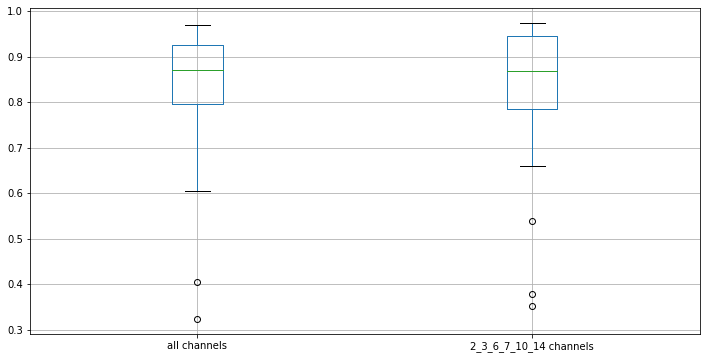

In [4]:
ova_results_df = pd.read_csv('./svc-oneVSall.csv')
ova_results_df.boxplot(column=['all channels', '2_3_6_7_10_14 channels'], figsize=(12, 6))
ova_results_df[['all channels', '2_3_6_7_10_14 channels']].describe()